# SF-DAT-21 | Unit Project 2

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

### Step 1: Load the python libraries you will need for this project

In [4]:
# imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline
plt.style.use('ggplot')

### Step 2: Read in your data set

In [5]:
# read in data from source
df_raw = pd.read_csv("../../dataset/admissions.csv")
print df_raw.head()

df_raw.head(10)

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


## Questions
#### Question 1. How many observations are in our dataset?


In [6]:
print df_raw.columns
print df_raw.count()
df_raw


Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')
admit       400
gre         398
gpa         398
prestige    399
dtype: int64


,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


Answer: df_raw shows there are 400 rows, which means there are 400 observations

#### Question 2. Create a summary table.

In [7]:
# function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The GRE is scored on a much wider range than GPA (a 800 pt scale vs a 4 point scale)

#### Question 4. Drop data points with missing data.


In [9]:
print df_raw.admit.isnull().sum()
print df_raw.gre.isnull().sum()
print df_raw.gpa.isnull().sum()
print df_raw.prestige.isnull().sum()

df_new = df_raw.dropna() #is it bad practice to drop the missing data from the entire dataframe rather than by each column?
print len(df_new)
print df_new.count()

#shows which rows were dropped
df_raw[~df_raw.isin(df_new)].dropna(how = 'all')

0
2
2
1
397
admit       397
gre         397
gpa         397
prestige    397
dtype: int64


,admit,gre,gpa,prestige
187,0.0,NaN,NaN,2.0
212,0.0,NaN,2.87,2.0
236,1.0,660.0,NaN,NaN


#### Question 5. Confirm that you dropped the correct data.  How can you tell?

Answer: using df_new.count() shows there are now 397 observations meaning we dropped 3 rows from the original 400 (though it would be nice to show exactly which observations/rows were dropped somehow)

#### Question 6. Create box plots for GRE and GPA.

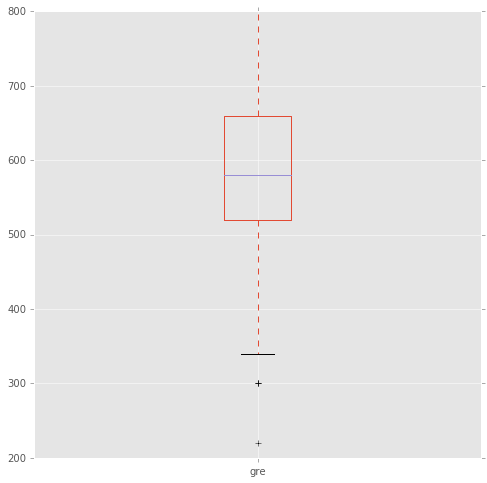

In [95]:
# boxplot 1
df_new.gre.plot(kind = 'box', figsize = (8, 8))

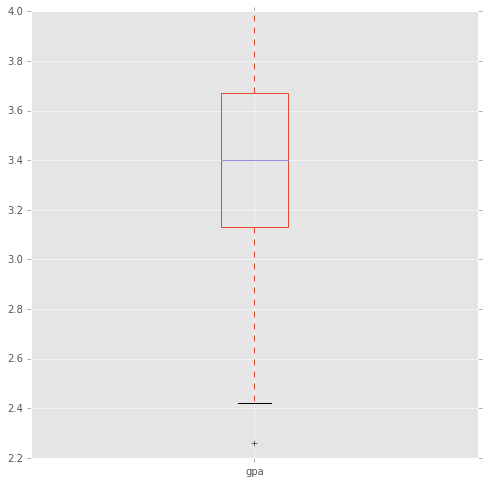

In [96]:
# boxplot 2
df_new.gpa.plot(kind = 'box', figsize = (8, 8))

#### Question 7. What do this plots show?

Answer:

#### Question 8. Describe each distribution.

In [97]:
# plot the distribution of each variable
# df_new[ ['admit', 'gre', 'gpa', 'prestige'] ].plot(kind = 'hist', figsize = (8, 8))

0.787669147851


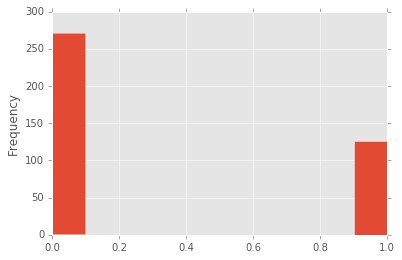

In [112]:
# distribution for admit
df_new.admit.plot.hist()

# skew
print df_new['admit'].skew()

-0.146046988216


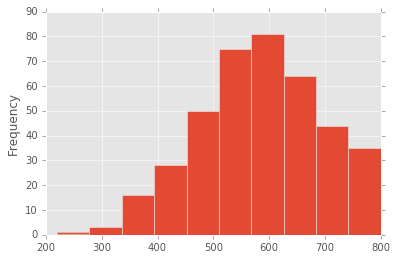

In [111]:
# distribution for gre
df_new.gre.plot.hist()

# skew
print df_new['gre'].skew()

-0.216888932969


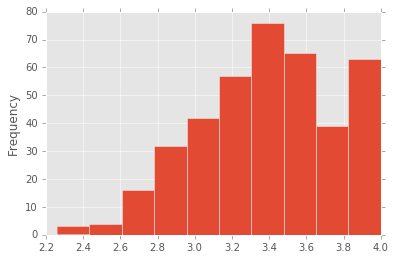

In [110]:
# distribution for gpa
df_new.gpa.plot.hist()

# skew
print df_new['gpa'].skew()

0.0865055528971


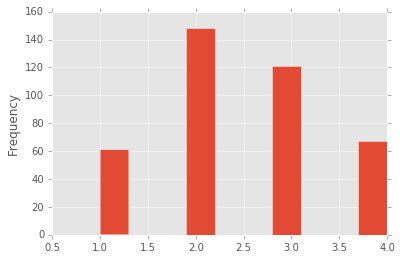

In [113]:
# distribution for prestige
df_new.prestige.plot.hist()

# skew
print df_new['prestige'].skew()

#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

Answer: GRE, GPA, and Prestige are all close to a normal distrubtion, however all the distributions are slightly skewed. Since we are trying to predict the variable Admit we'll exclude that. Distributions for variables GRE and GPA are similar, with the exception that far right (high scores) are lower for GRE scores (which is likely due to GPA having more factors involved such as participation, extra credit, etc where as GRE are solely based on test scores). The distribution of Prestige is similar to GRE which makes sense considering schools with higher prestige require higher GRE scores. But again all distributions are skewed so I don't this data meets the requirement for the model.

#### Question 10. Does this distribution need correction?  If so, why?  How?

Answer:

#### Question 11. Which of our variables are potentially colinear?

In [104]:
# create a correlation matrix for the data
df_new.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: Looks like GRE and GPA are colinear in regards to Admit because both values (0.18 for GRE and 0.17 for GPA) are close to one another. However, neither GRE, GPA, or Prestige appear to correlate to Admit. In fact, it's interesting that Prestige is negative. This seems to imply that the higher ratings of prestige for undergraduate schools make it less likely to be admitted to law school. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

Answer:

#### Question 14. What is your hypothesis?

Answer:

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data.

#### 2. Bonus: Log transform the skewed data.

In [2]:
# is reducing skew = normalizing data?"

#### 3. Advanced: Impute missing data.